In [ ]:
from det_curve.DET import DET as DET
from pathlib import Path
from scipy.stats import describe
import math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rc("axes", axisbelow=True)

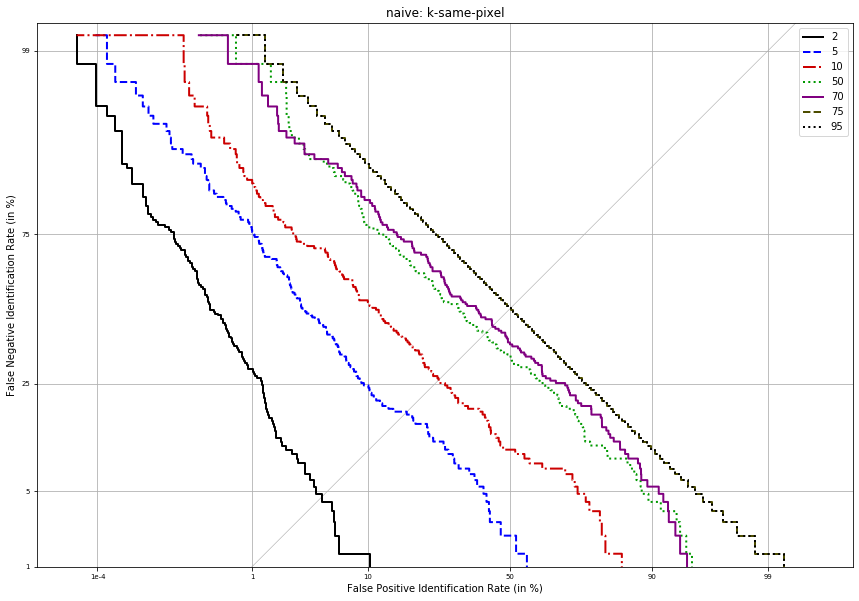

In [26]:
path = 'results/stats/'
method = 'pixel'
eval_type = 'naive'

k_range = [2, 5, 10 ,50,  70 ,75, 95 ]

if method == 'same':
    plot_name = eval_type + ': k-same-PartialM'

elif method == 'eigen': 
    plot_name = eval_type + ': k-same-eigen'
elif method == 'pixel':
    plot_name = eval_type + ': k-same-pixel'

else:
    plot_name = eval_type + ': ' + method
    if method == 'pixelated':
        k_range = [50, 70, 75, 80, 83, 85, 90]

det = DET(biometric_evaluation_type='identification', 
          abbreviate_axes=False, plot_eer_line=True, 
          plot_title=plot_name, cleanup_segments_distance=0.001)
det.x_limits = np.array([.00001, .999])
det.y_limits = np.array([.01, .995])
det.x_ticks = np.array([1e-4, 1e-2, 10e-2, 50e-2, 90e-2, 99e-2])
det.x_ticklabels = np.array(['1e-4', '1', '10', '50', '90', '99'])
det.y_ticks = np.array([1e-2, 5e-2, 25e-2, 75e-2, 99e-2])
det.y_ticklabels = np.array([ '1', '5', '25', '75', '99'])

det.create_figure()

for ind, k in enumerate(k_range):
    system_name = path + method + '_' + eval_type + '_' + str(k)
    
    genuine_score_file = f"{system_name}_genuine_score.txt.gz"
    impostor_score_file = f"{system_name}_impostor_score.txt.gz"
    genuine_scores = np.loadtxt(genuine_score_file)
    impostor_scores = np.loadtxt(impostor_score_file)
    det.plot(tar=np.array(genuine_scores), non=np.array(impostor_scores), label=str(k))
    
det.legend_on()
det.show()
